In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, tidetools, ellipse

from nowcast import analyze
from nowcast.figures import research_VENUS

import datetime
import numpy as np

import netCDF4 as nc

% matplotlib inline

In [2]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

In [3]:
## CODAR region plus a little bit south
jmin = 340
jmax = 461
imin = 200
imax = 321
jss = np.arange(jmin, jmax)
iss = np.arange(imin, imax)
jss = np.append(jss[0]-1, jss)
iss = np.append(iss[0]-1, iss)
to=datetime.datetime(2016,6,22)
tf=datetime.datetime(2016,8,25)
# bathymetry and grid
bathy, lons, lats = tidetools.get_bathy_data(grid)
lonssub = lons[jmin:jmax, imin:imax]
latssub = lats[jmin:jmax, imin:imax]

# Nowcast

In [4]:
filesu = analyze.get_filenames(to, tf, '1d', 'grid_U', '/results/SalishSea/nowcast/')
filesv = analyze.get_filenames(to, tf, '1d', 'grid_V', '/results/SalishSea/nowcast/')

 # Load the files
u, time = analyze.combine_files(filesu, 'vozocrtx', [0], jss, iss)
v, time = analyze.combine_files(filesv, 'vomecrty', [0],  jss, iss)
uE, vN= research_VENUS.unstag_rot(u, v)

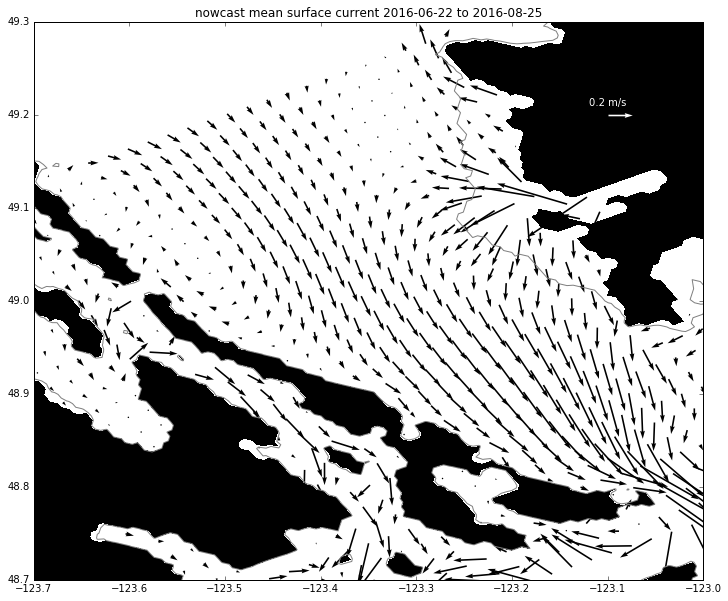

In [5]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
st=4
q=ax.quiver(lonssub[::st,::st], latssub[::st,::st], 
            uE.mean(axis=0)[0,::st,::st],vN.mean(axis=0)[0,::st,::st])
viz_tools.plot_land_mask(ax,grid, coords='map')
viz_tools.plot_coastline(ax,grid,coords='map',isobath=5,color='gray')
ax.set_xlim([-123.7,-123])
ax.set_ylim([48.7,49.3])
ax.quiverkey(q,-123.1,49.2,.2, '0.2 m/s', coordinates='data',color='w',labelcolor='w')
ax.set_title('{} mean surface current {} to {}'.format('nowcast', 
                                                        to.strftime('%Y-%m-%d'),
                                                        tf.strftime('%Y-%m-%d')))
ax.get_xaxis().get_major_formatter().set_useOffset(False)

In [6]:
fig.savefig('Mean_surface_current_nowcast.png', dpi=300,bbox_inches='tight')

# Nowcast-green

In [7]:
filesu = analyze.get_filenames(to, tf, '1d', 'grid_U', '/results/SalishSea/nowcast-green/')
filesv = analyze.get_filenames(to, tf, '1d', 'grid_V', '/results/SalishSea/nowcast-green/')

 # Load the files
u, time = analyze.combine_files(filesu, 'vozocrtx', [0], jss, iss)
v, time = analyze.combine_files(filesv, 'vomecrty', [0],  jss, iss)

uE, vN= research_VENUS.unstag_rot(u, v)

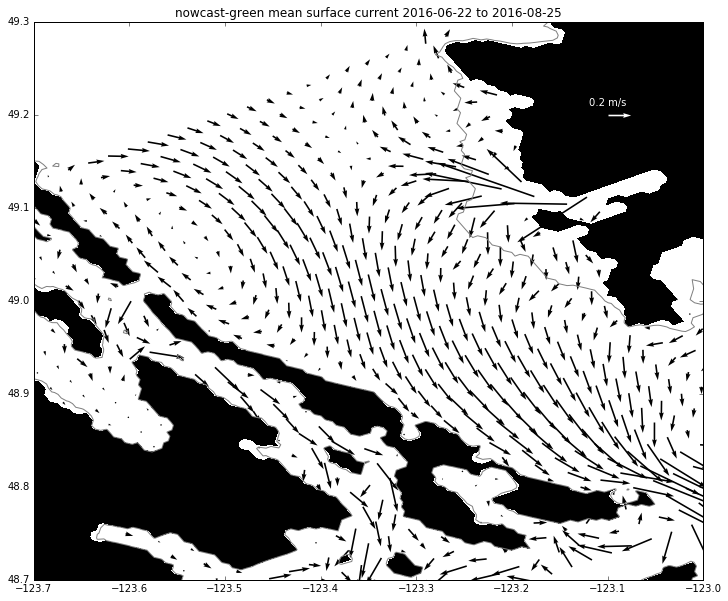

In [8]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
st=4
q=ax.quiver(lonssub[::st,::st], latssub[::st,::st], 
            uE.mean(axis=0)[0,::st,::st],vN.mean(axis=0)[0,::st,::st])
viz_tools.plot_land_mask(ax,grid, coords='map')
viz_tools.plot_coastline(ax,grid,coords='map',isobath=5,color='gray')
ax.set_xlim([-123.7,-123])
ax.set_ylim([48.7,49.3])
ax.quiverkey(q,-123.1,49.2,.2, '0.2 m/s', coordinates='data',color='w',labelcolor='w')
ax.set_title('{} mean surface current {} to {}'.format('nowcast-green', 
                                                        to.strftime('%Y-%m-%d'),
                                                        tf.strftime('%Y-%m-%d')))
ax.get_xaxis().get_major_formatter().set_useOffset(False)

In [9]:
fig.savefig('Mean_surface_current_nowcast-green.png', dpi=300,bbox_inches='tight')